# Multi-Class Classification

In the previous lectures we learned about how to use logistic regression to perform a binary classification. In many real life situations, we actually need to classify data into multiple classes.

For this series of lectures, we'll go through the following steps:

    1.) Introduction to the Iris Data Set
    2.) Introduction to Multi-Class Classification (Logistic Regression)
    3.) Data Formatting
    4.) Data Visualization Analysis
    5.) Multi-Class Classification with Sci Kit Learn
    6.) Explanation of K Nearest Neighbors
    7.) K Nearest Neighbors with Sci Kit Learn
    8.) Conclusion


Let's get started!

### Step 1: Introduction to the Iris Data Set

For this series of lectures, we will be using the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

Here's a picture of the three different Iris types:

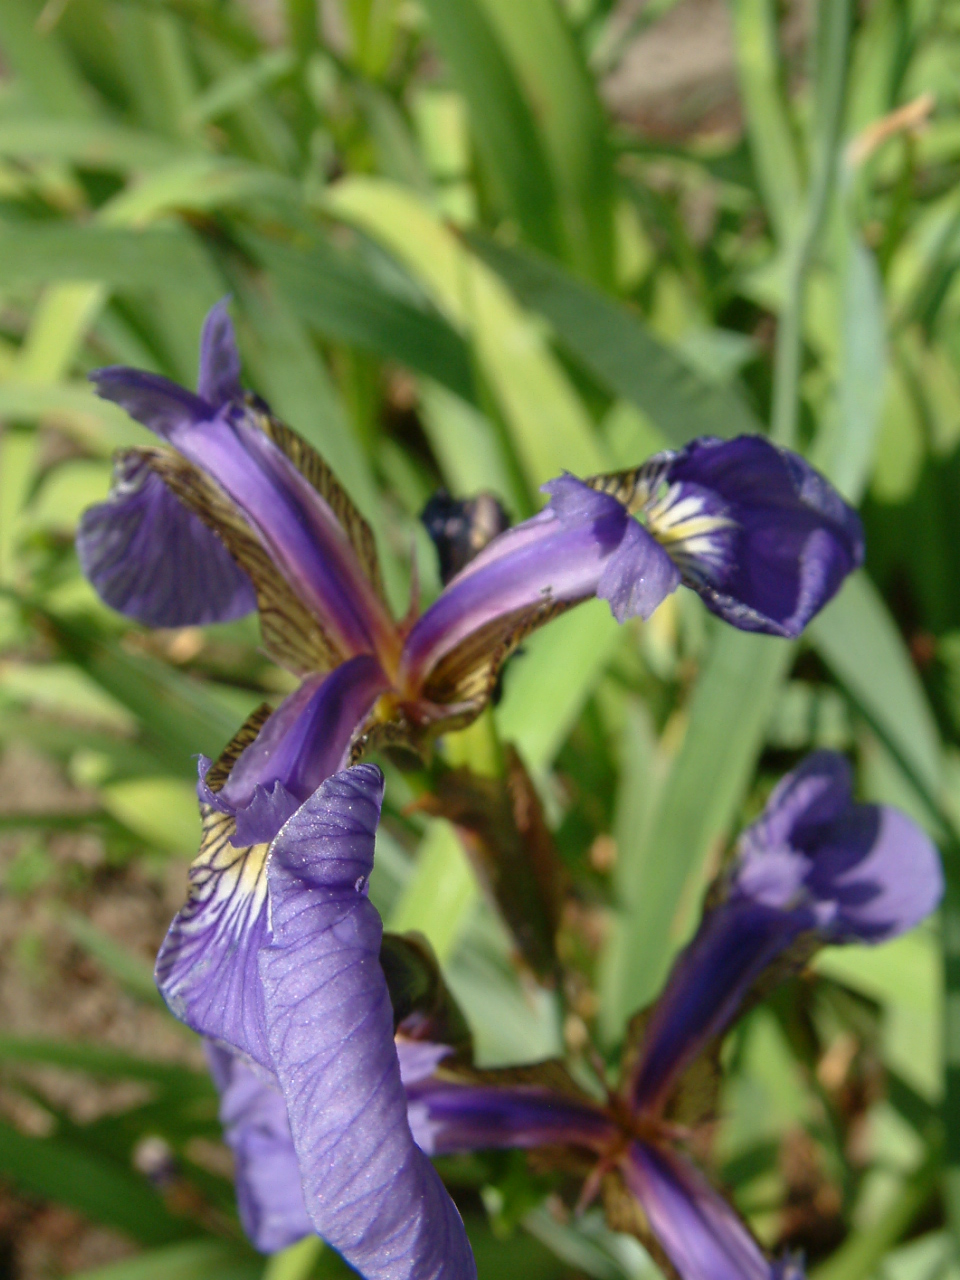

In [1]:
# The Iris Setosa
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'
Image(url,width=300, height=300)

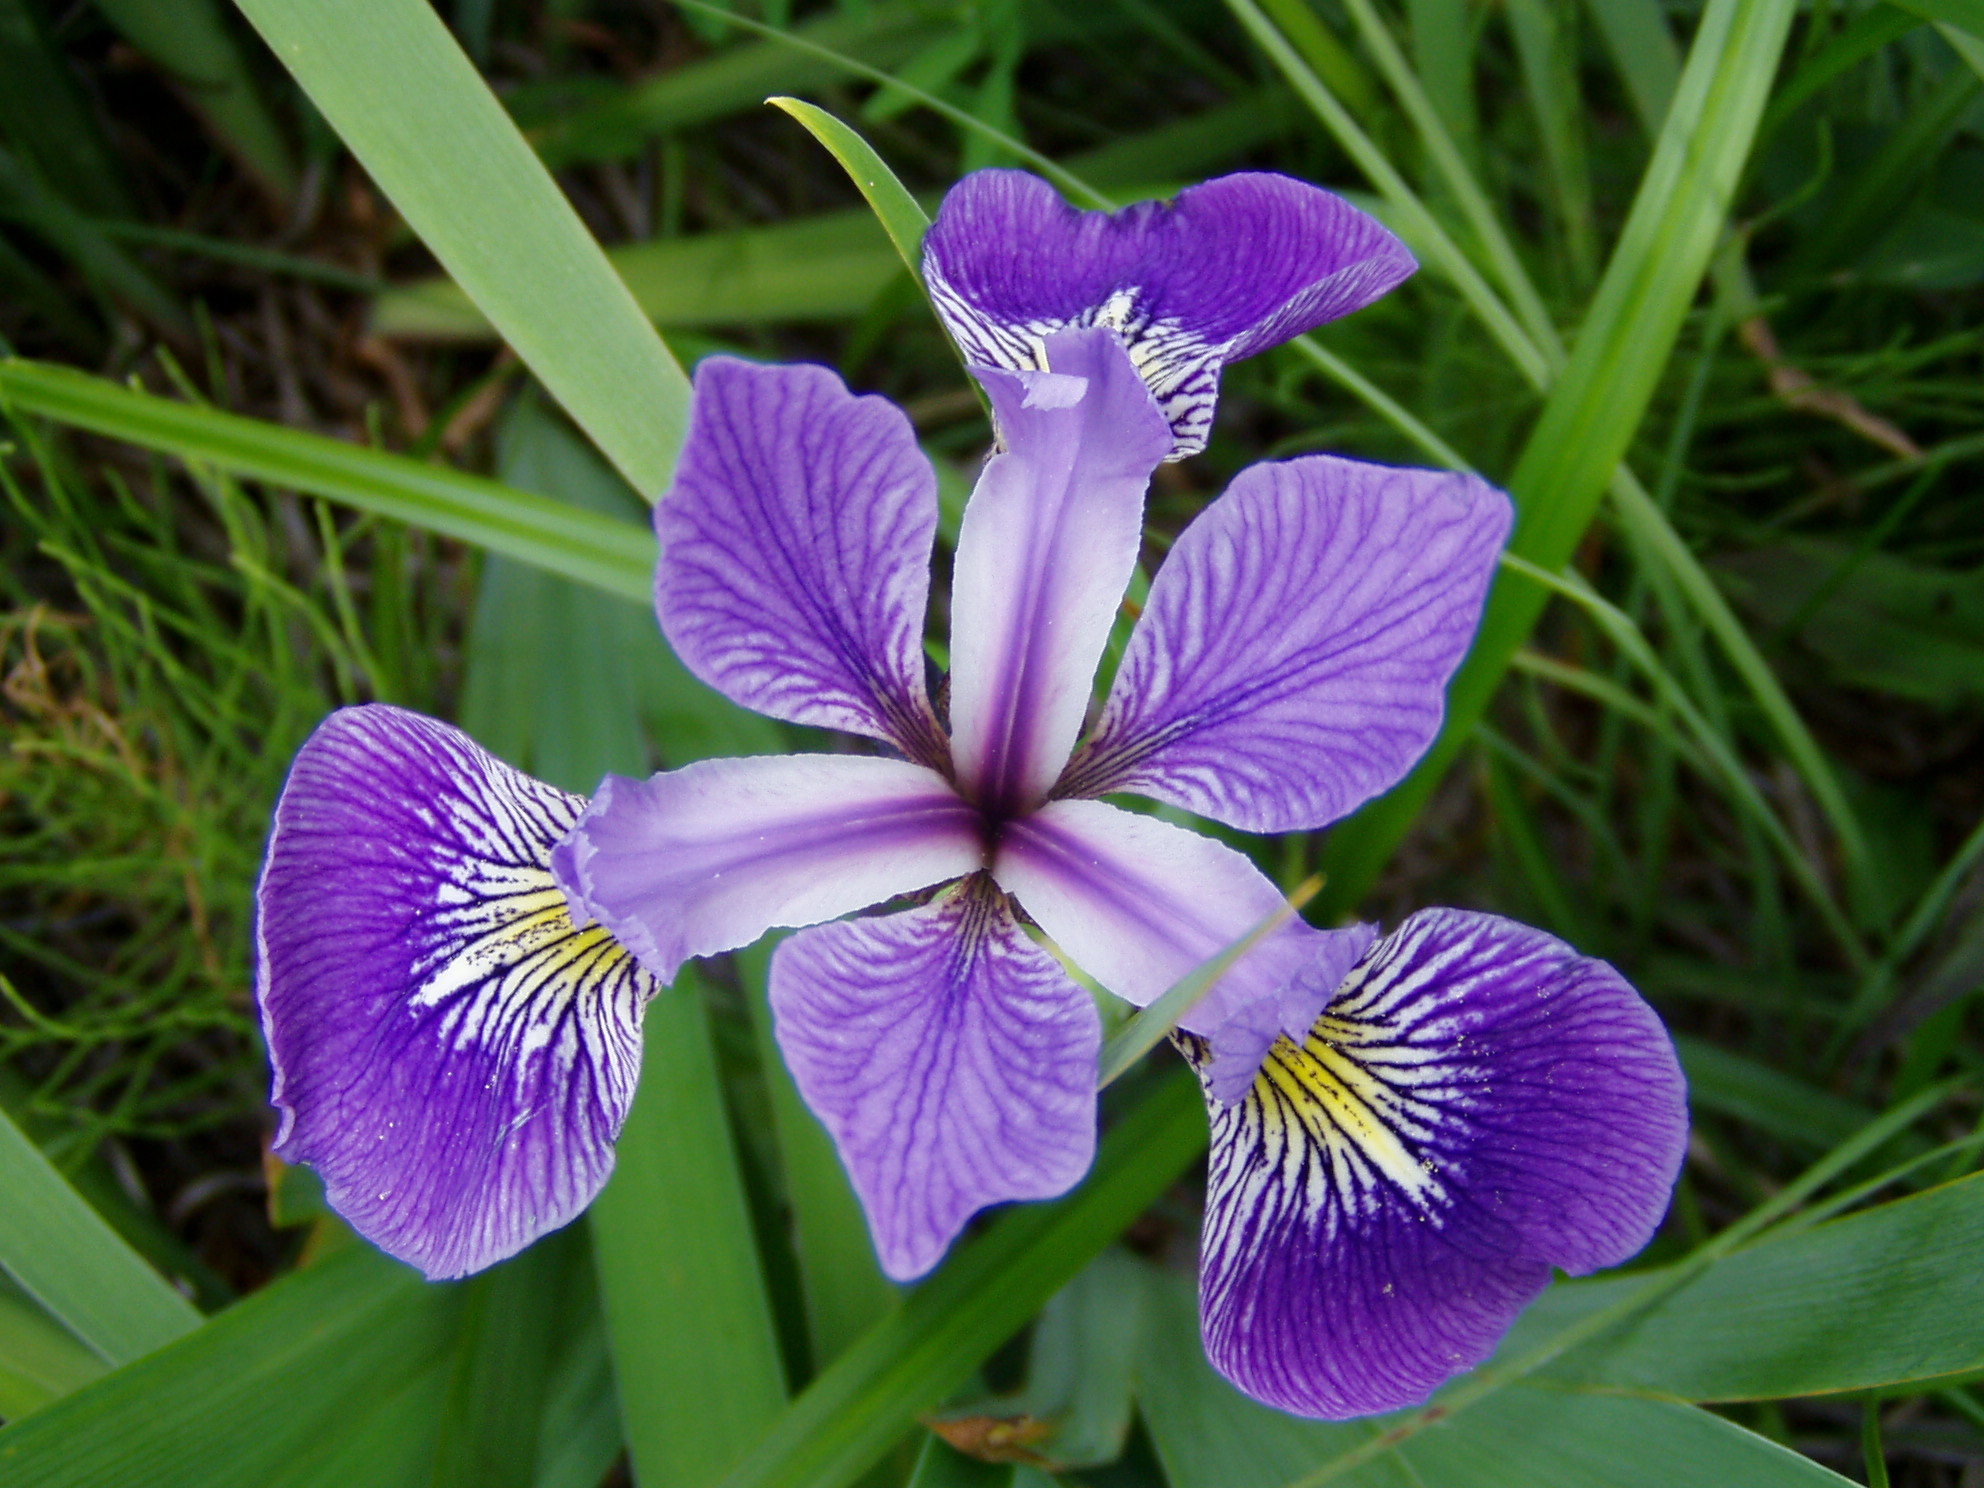

In [2]:
# The Iris Versicolor
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg'
Image(url,width=300, height=300)

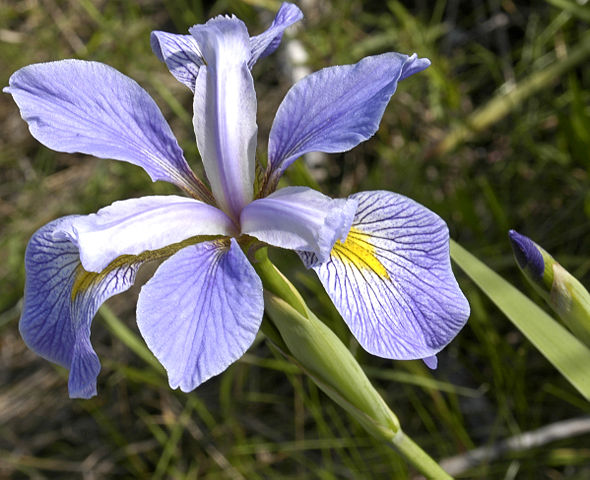

In [3]:
# The Iris Virginica
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/590px-Iris_virginica.jpg'
Image(url,width=300, height=300)

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

Here's a picture describing the petals and the sepals.

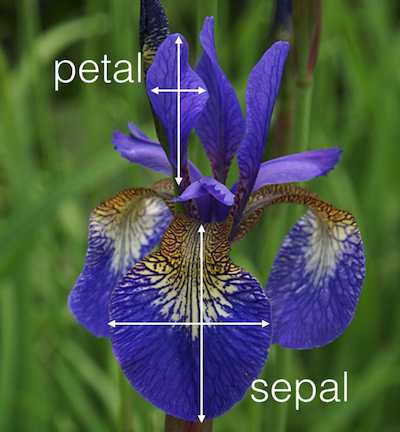

In [4]:
# The Iris Sepals and Petals
from IPython.display import Image
url = 'http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/04/iris_petal_sepal.png'
Image(url,width=300, height=300)

### Step 2: Introduction to Multi-Class Classification

In this section we will learn how to use multi-class classification with SciKit Learn to seperate data into multiple classes. 

We will first use SciKit Learn to implement a strategy known as one vs all (sometimes called one vs rest) to perform multi-class classification. This method works by basically performing a logistic regression for binary classification for each possible class. The class that is then predicted with the highest confidence is assigned to that data point. For a great visual explanation of this, here is Andrew Ng's quick explanation of how one-vs-rest works.

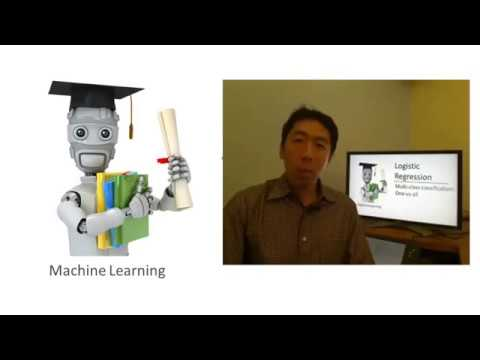

In [5]:
# Andrew Ng's visual Explanation for Multiclass Classification
from IPython.display import YouTubeVideo
YouTubeVideo("-EIfb6vFJzc")

### Step 3: Data Formatting

After we use the one-vs-all logistic regression method, we will use k nearest neighbors method to classify the data. For now, let's go ahead and start with our imports.

In [6]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

Load the data set from Scikit Learn

In [7]:
from sklearn import linear_model
from sklearn.datasets import load_iris

# Import the data
iris = load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target

# Show the Built-in Data Description
print( iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Let's put the data into a pandas DataFrame.

In [8]:
# Grab data
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

# Grab Target
iris_target = DataFrame(Y,columns=['Species'])

If we look at the iris_target data, we'll notice that the Species are still defined as either 0,1,or 2. Let's go ahead and use apply() to split the column, apply a naming scheme function, and then combine it back together.

In [9]:
def flower(num):
    ''' Takes in numerical class, returns flower name'''
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

# Apply
iris_target['Species'] = iris_target['Species'].apply(flower)

In [10]:
#Check
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [11]:
# Create a combined Iris DataSet
iris = pd.concat([iris_data,iris_target],axis=1)

# Preview all data
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Step 4: Data Visualization Analysis
Let's do some quick visualizations of the data. We can actually do a very broad and quick birds eye view with seaborn's pairplot.

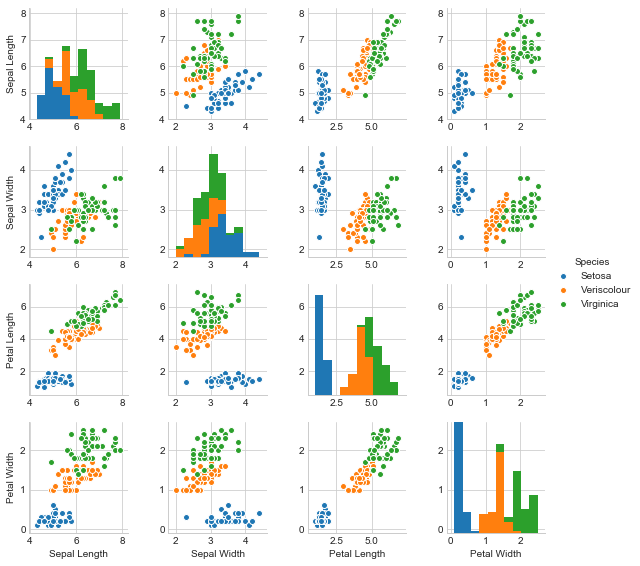

In [12]:
# First a pairplot of all the different features
sns.pairplot(iris,hue='Species',size=2)

Awesome! With this pairplot we can actually begin to see the grouping between the 3 different Iris types. We'll have to ignore the "Species" vs "Species" since this is categorical data. 

A quick observation with this visualization allows us to see that Iris type Setosa has the most distinct features out of the three types.

We can also use the seaborn to perform histograms for all the species on a particular feature. For example, let's examine the petal length distributions for all the Species.

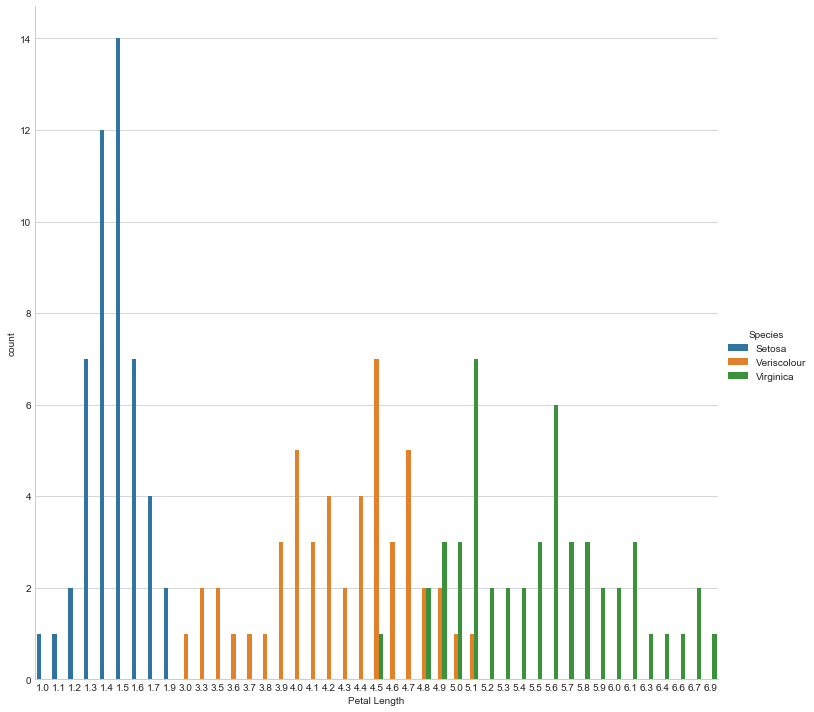

In [13]:
sns.factorplot('Petal Length',data=iris,hue='Species',size=10, kind = 'count')


I'll leave it up to you to perform any other data visualizations you might be curious about!

Let's now go ahead and continue with using Scikit Learn to Perform the one-vs-all method of Logistic Classification for multiple classes.


### Step 5: Multi-Class Classification with Scikit Learn

Let's go ahead and start using SciKit Learn to perform a Multi-Class Classification using Logistic Regression Techniques.

We already have X and Y defined as the Data Features and Target so let's go ahead and continue with those arrays. We will then have to split the data into Testing and Training sets. I'll pass a test_size argument to have the testing data be 40% of the total data set. I'll also pass a random seed number.

In [14]:
# Import SciKit Learn Log Reg
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a Logistic Regression Class object
logreg = LogisticRegression()

# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=3)

# Train the model with the training set
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now that we've trained our model with a training set, let's test our accuracy with the testing set. We'll make a prediction using our model and then check its accuracy.

In [15]:
# Import testing metrics from SciKit Learn
from sklearn import metrics

# Prediction from X_test
Y_pred = logreg.predict(X_test)

#Check accuracy
print( metrics.accuracy_score(Y_test,Y_pred))

0.933333333333


Looks like our model had almost 93% accuracy. (Note: this could change from run to run due to the random splitting) Should we trust this level of accuracy? I encourage you to figure out ways to intuitively understand this result. Try looking at the PairPlot again and check to see how separate the data features initially were. Also try changing the test_size parameter and check how that effects the outcome. In conclusion, given how clean the data is and how seperated some of the features are, we should expect pretty high accuracy.

Now let's see how to use K-Nearest Neighbors to implement Multi-Class Classification!

### Step 6: K-Nearest Neighbors

Let's start with a basic overview of the [K-Nearest Neighbors Algorithm](http://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). The premise of the algorithm is actually quite simple. Given an object to be assigned to a class in a feature space, select the class that is "nearest" to the negihbors in the training set. This 'nearness" is a distance metric, which is usually a Euclidean distance.  

The k-nearest neighbor (kNN) algorithm is very well explained in the following two videos. The first one is a quick overall explanation and the second one is an MIT OpenCourse Lecture on the topic. I encourage you to check them both out. Following the videos I'll have an in Notebook explnation of the algorithm.

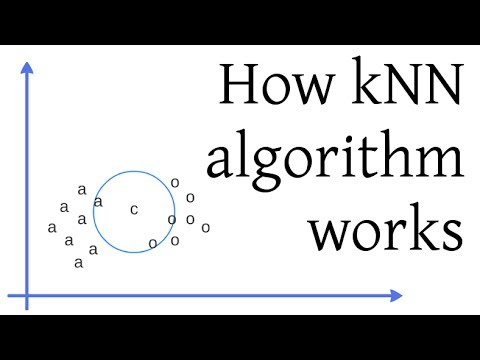

In [16]:
# Short Explanation
from IPython.display import YouTubeVideo
YouTubeVideo('UqYde-LULfs')

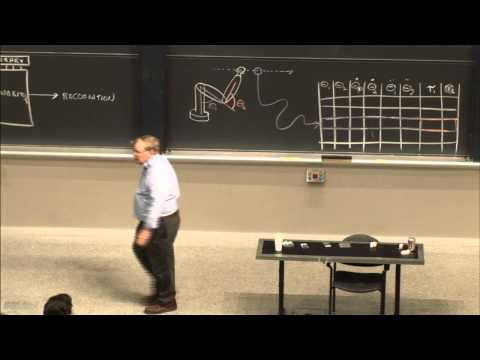

In [17]:
# MIT Lecture
YouTubeVideo('09mb78oiPkA')

For a quick explanation in this Notebook Lecture, we can demonstrate the concept with an example. Take for instance the following diagram:

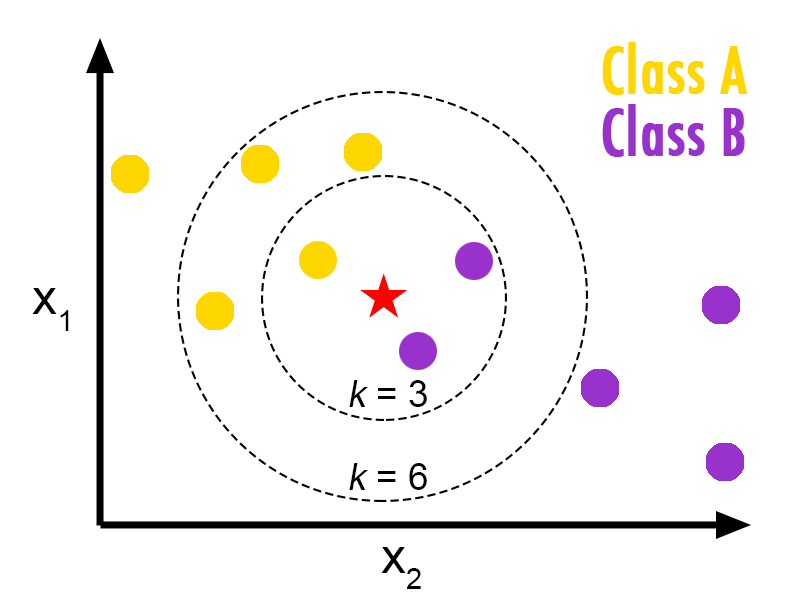

In [18]:
Image('http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png',width=400, height=300)

Imagine we have two Classes in our training set, A and B. Then we have to classify a new data point in our testing data, we represent this as a red star. Now we just expand a specific distance away from our feature space until we hit k number of other data points. In the figure above you can see the differences between various k values. An important thing to note, for a binary classification using this method, we must choose an odd number for k, to avoid the case of a "tied" distance between two classes.

### Step 7: kNN with SciKit Learn

Let's go ahead and see kNN Algorithm in action with SciKit Learn and our Iris dataset!

In [19]:
#Import from SciKit Learn
from sklearn.neighbors import KNeighborsClassifier

# We'll first start with k=6

# Import the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the data
knn.fit(X_train,Y_train)

# Run a prediction
Y_pred = knn.predict(X_test)

# Check Accuracy against the Testing Set
print( metrics.accuracy_score(Y_test,Y_pred))

0.95


Looks like using k=6 got us around 95% accuracy. Let's see what happens if we reduce that value to k=1, that means the closest point in the feature space to our testing data point will be the class the testing point joins.

In [20]:
# Import the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit the data
knn.fit(X_train,Y_train)

# Run a prediction
Y_pred = knn.predict(X_test)

# Check Accuracy against the Testing Set
print( metrics.accuracy_score(Y_test,Y_pred))

0.966666666667


Looks like using k=1 got us around 96% accuracy. How about we cycle through various k values and find the optimal value.

In [21]:
# Test k values 1 through 20
k_range = range(1, 21)

# Set an empty list
accuracy = []

# Repeat above process for all k values and append the result
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Now let's plot the results!

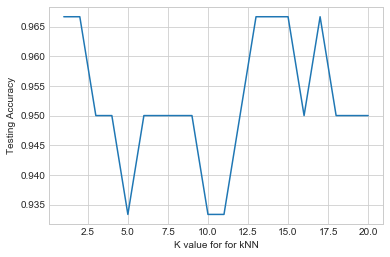

In [22]:
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')
plt.show()

Interesting! Try changing the way Sci Kit Learn split the training and Testing data sets and try re-running this analysis. What changed?


### Step 8: Conclusion

We've learned how to perform Multi-Class Classification using two great techniques, Logistic Regression and k-Nearest Neighbors.

Here are several more resources for you to Explore:

1.) [Wikipedia on Multiclass Classification](http://en.wikipedia.org/wiki/Multiclass_classification)

2.) [MIT Lecture Slides on MultiClass Classification](http://www.mit.edu/~9.520/spring09/Classes/multiclass.pdf)

3.) [Scikit Learn Documentation](http://scikit-learn.org/stable/modules/multiclass.html)

4.) [DataRobot on Classification Techniques](https://www.datarobot.com/blog/classification-with-scikit-learn//)

### Great Job!